# ADVANCED STASTICS:  Laboratory Session 2

## Baci Ema 2050726

## Imports

In [24]:
# RUN TWICE TO REMOVE THE WARNING

suppressPackageStartupMessages({
    library(plotly)#, warn.conflicts = FALSE
    library(ggplot2)
    library(magick)
    library(tibble)
    library(readr)
    library(tidyverse)
    library(sqldf)
    library(dplyr)
    library(purrrlyr)
    library(zoo)
    library(tibbletime)
    library(GoFKernel)
})


## Plotting functions

In [2]:
plt <- function( x = NULL, y, type = 'barplot'){ 

    switch(type, 
        barplot={
                p <- qplot() + 
                    geom_bar(aes(x = x, y = y), stat = "identity", 
                             color = 'orange', fill = 'orange') 
                },
        barplot2 = {
                p <- qplot() + 
                    geom_bar(aes(x = x, y = y), stat = "identity", 
                             color = 'black', fill = 'limegreen', width = 1)            
        },
        line={    
                p <- qplot(x = x, y = y) + 
                    geom_point(color = 'thistle4',   size = 4) + 
                    geom_line(  color ='darkorange', size = 1.5)   
            },
        hist={
                 p <- qplot( x = y ) + 
                    geom_histogram(fill = 'mediumvioletred', col = 'mediumvioletred', bins = 100, binwidth = 0.03 )  

        }
        )
    
        return(p)
    }


background <- function(p, title = 'title',labelx = 'x' , labely= 'dp(x)/dx'){
    
    options(repr.plot.width = 15, repr.plot.height = 8, las = 1)
    
    layout <- theme( axis.text  = element_text(size = 14),
                     plot.title = element_text(color="black", size=24, face="bold"),
                     axis.title = element_text(size = 18, face= "bold"),
                     panel.background = element_rect(fill     = 'lavender',
                                                 colour   = "lavender",
                                                 size     = 0.5, 
                                                 linetype = "solid"),
                     panel.grid.major = element_line(size     = 0.5, 
                                                 linetype = 'solid',
                                                 colour   = "white"), 
                     panel.grid.minor = element_line(size     = 0.5, 
                                                 linetype = 'solid',
                                                 colour = "white")) 
                                       
    
    labels  <- labs( x = labelx,
                     y = labely,
                    title= title)

    return( p + layout + labels )
    
}



## EXERCISE 1

A set of measurements have been performed on the concentration of a contaminant
in tap water. The following tables reports a set of values (x), with the corresponding
probabilities given by the two methods (p1 and p2)

In [3]:
x  <- c( 15.58, 15.9, 16, 16.1, 16.2 )

p1 <- c(0.15, 0.21, 0.35, 0.15, 0.14)
p2 <- c(0.14, 0.05, 0.64, 0.08, 0.09)

 Evaluate the expected values, E[X], and the variance, Var(X), for both methods

In [4]:
E1 <- sum( x*p1 )
E2 <- sum( x*p2 )

E1_2 <- sum( x*x*p1 )
E2_2 <- sum( x*x*p2 )

Var_1 <-  E1_2 - E1*E1
Var_2 <-  E2_2 - E2*E2

cat('Mean for the 2 methods: \t ')
cat( round(E1, 3),',',round(E2, 3), '\n' )
cat('Variance for the 2 methods: \t  ')
cat( round(Var_1, 3 ),',', round(Var_2, 3 ))

Mean for the 2 methods: 	 15.959 , 15.962 
Variance for the 2 methods: 	  0.034 , 0.028

## EXERCISE 2

The waiting time, in minutes, at the doctor’s is about 30 minutes, and the distribution follows an exponential pdf with rate 1/30.

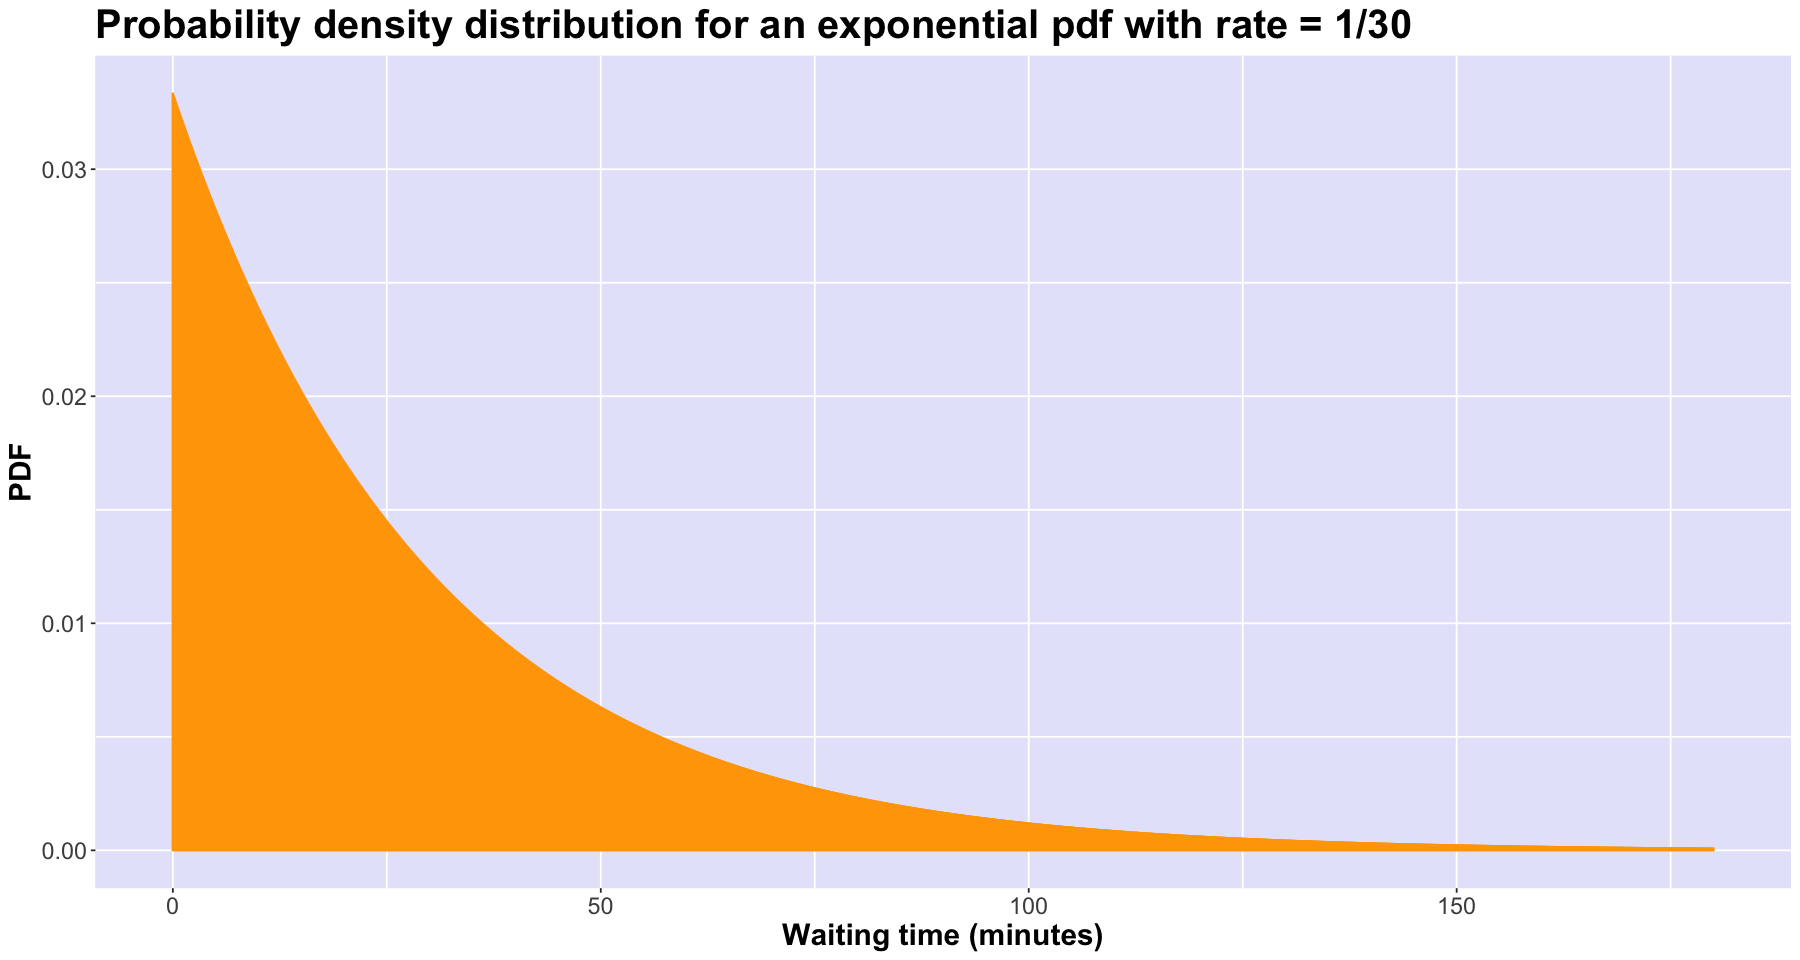

In [5]:
mu      <- 30 # minutes
lambda  <- 1/mu
step2   <- 0.1
x2A     <- seq(0, 180, step2)
pdf2    <- dexp(x2A, lambda)

background(plt(x2A, pdf2),'Probability density distribution for an exponential pdf with rate = 1/30' ,'Waiting time (minutes)' ,'PDF')


A) Simulate the waiting time for 50 people at the doctor’s office and plot the relative histogram

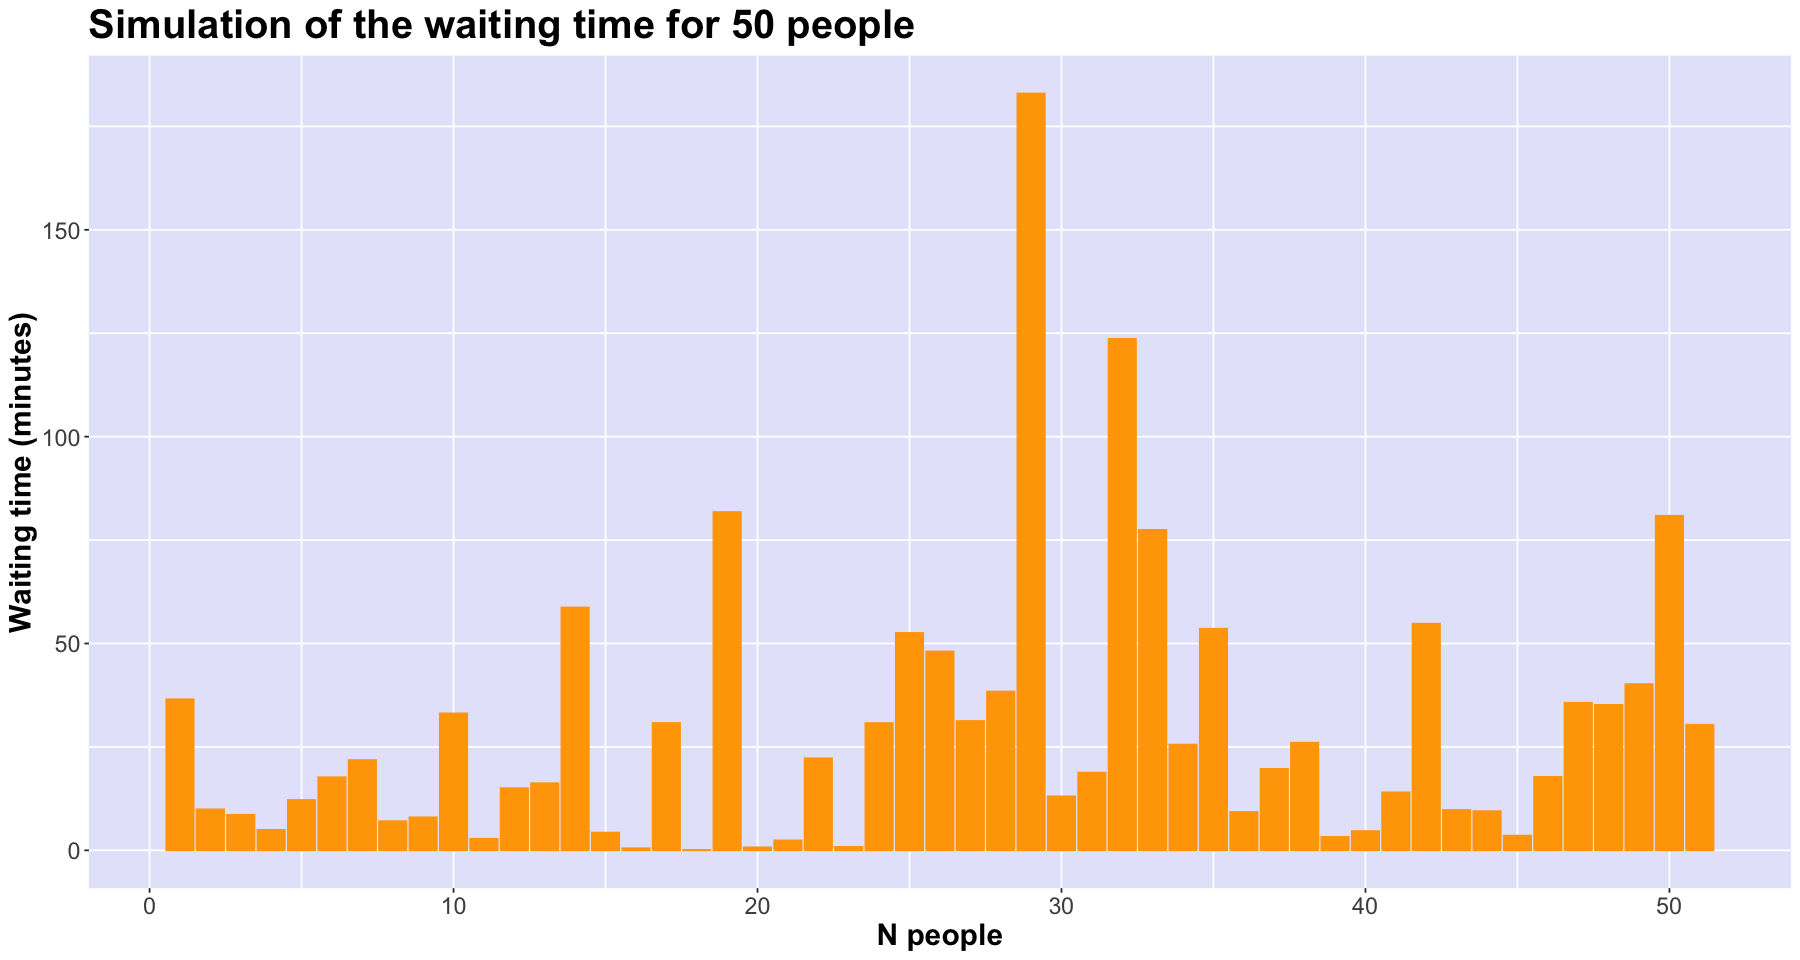

In [6]:
N         <- 1:51 # simulate the waiting time for 50 people 
waiting_t <- rexp(N, lambda)

background(plt(N, waiting_t),'Simulation of the waiting time for 50 people' ,'N people' ,'Waiting time (minutes)')

B) What is the probability that a person will wait for less than 10 minutes ?

The probability that a person will wait for less than 
10 minutes is given by the cdf function computed when the waiting 
time is 10 minute and it is equal to :  0.283

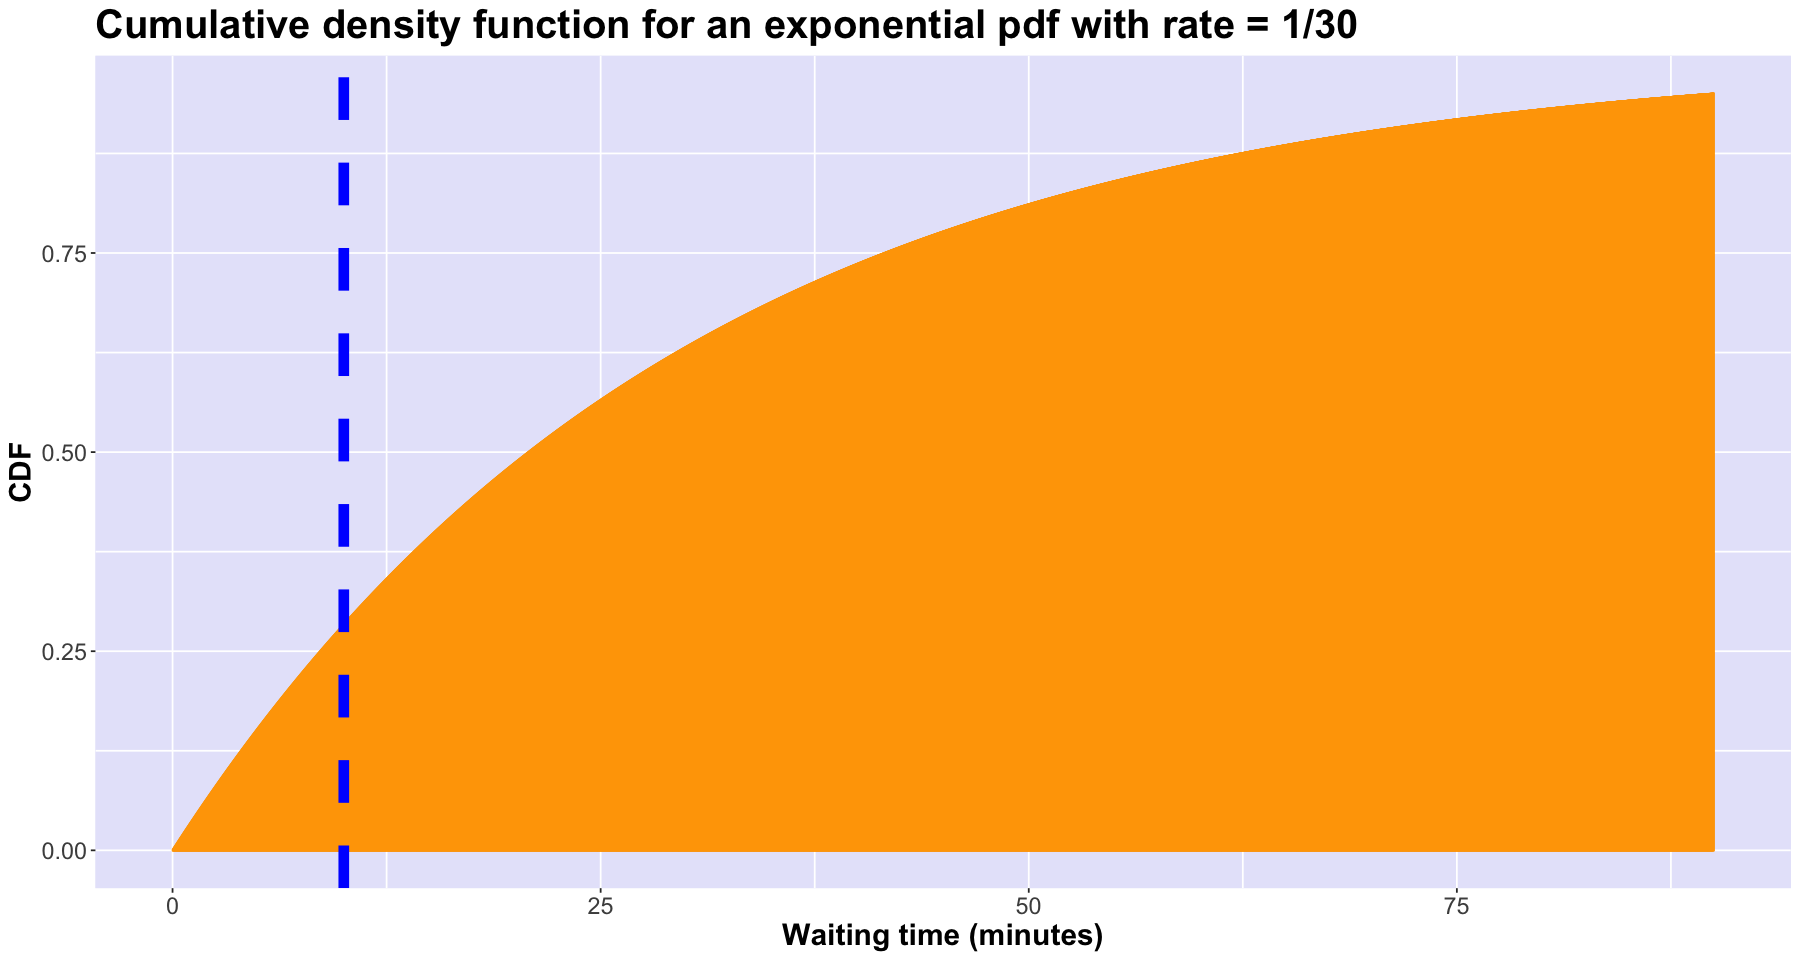

In [7]:
cat('The probability that a person will wait for less than \
10 minutes is given by the cdf function computed when the waiting \
time is 10 minute and it is equal to : ', round(pexp(10,lambda ), 3) )


mu      <- 30 # minutes
lambda  <- 1/30 
x2B      <- seq(0, 90, 0.01)

cdf2     <- pexp(x2B, lambda)


ax  <- background(plt(x2B, cdf2), 'Cumulative density function for an exponential pdf with rate = 1/30',  
                  'Waiting time (minutes)', 'CDF' )
line <- geom_vline( xintercept = 10, 
                    linetype   = "dashed", 
                    color      = "blue", 
                    size=3 )

ax+line


C) Evaluate the average waiting time from the simulated data and compare it with
the expected value (calculated from theory and by manipulating the probability
distributions using R)

In [8]:
cat('Averange waiting time from the simulated data:  ', sum(waiting_t)/50, 'minutes' )
cat('\nExpected value computed: \t\t\t', sum(x2A*step2*pdf2), 'minutes')
cat('\nExpected value real: \t\t\t\t', mu, '\t  minutes')

Averange waiting time from the simulated data:   29.72897 minutes
Expected value computed: 			 29.48018 minutes
Expected value real: 				 30 	  minutes

D) What is the probability for waiting more than one hour before being received ?

In [9]:
p_1h <- 1 - pexp(60, lambda )
cat('Probability of waiting more than one hour before being received:', round(p_1h, 4))

Probability of waiting more than one hour before being received: 0.1353

## EXERCISE 3

Let’s suppose that on a book, on average, there is one typo error every three pages.
If the number of errors follows a Poisson distribution, plot the pdf and cdf.

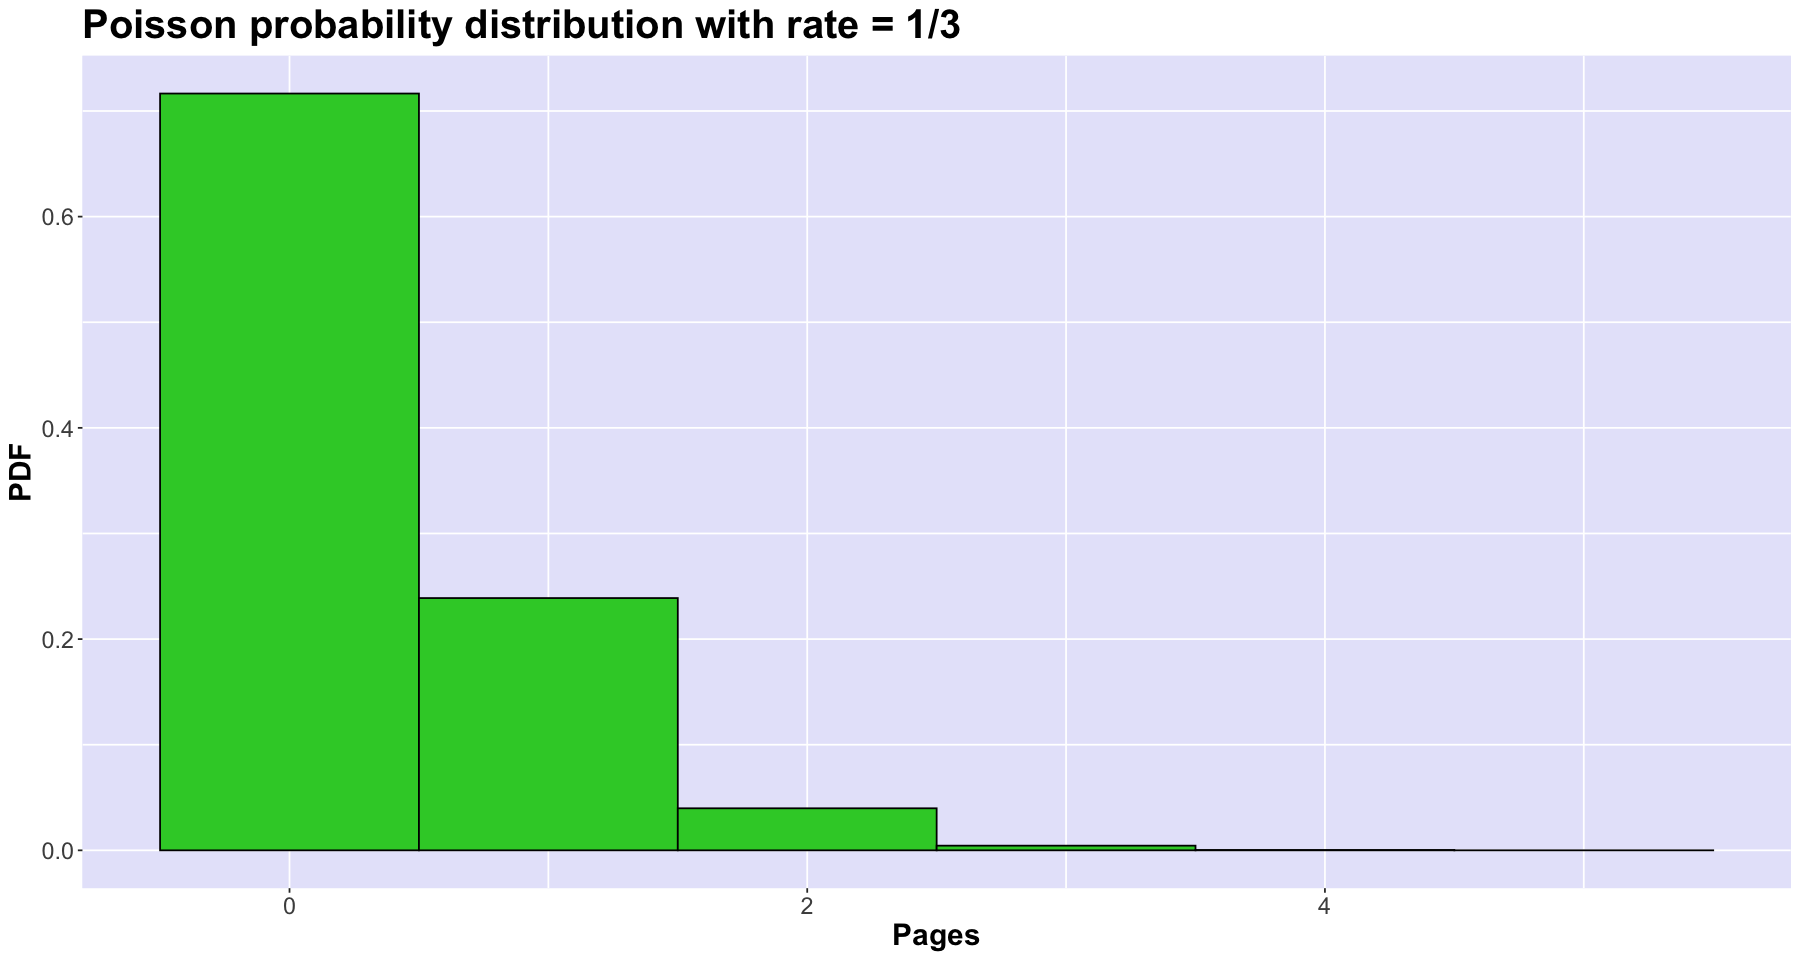

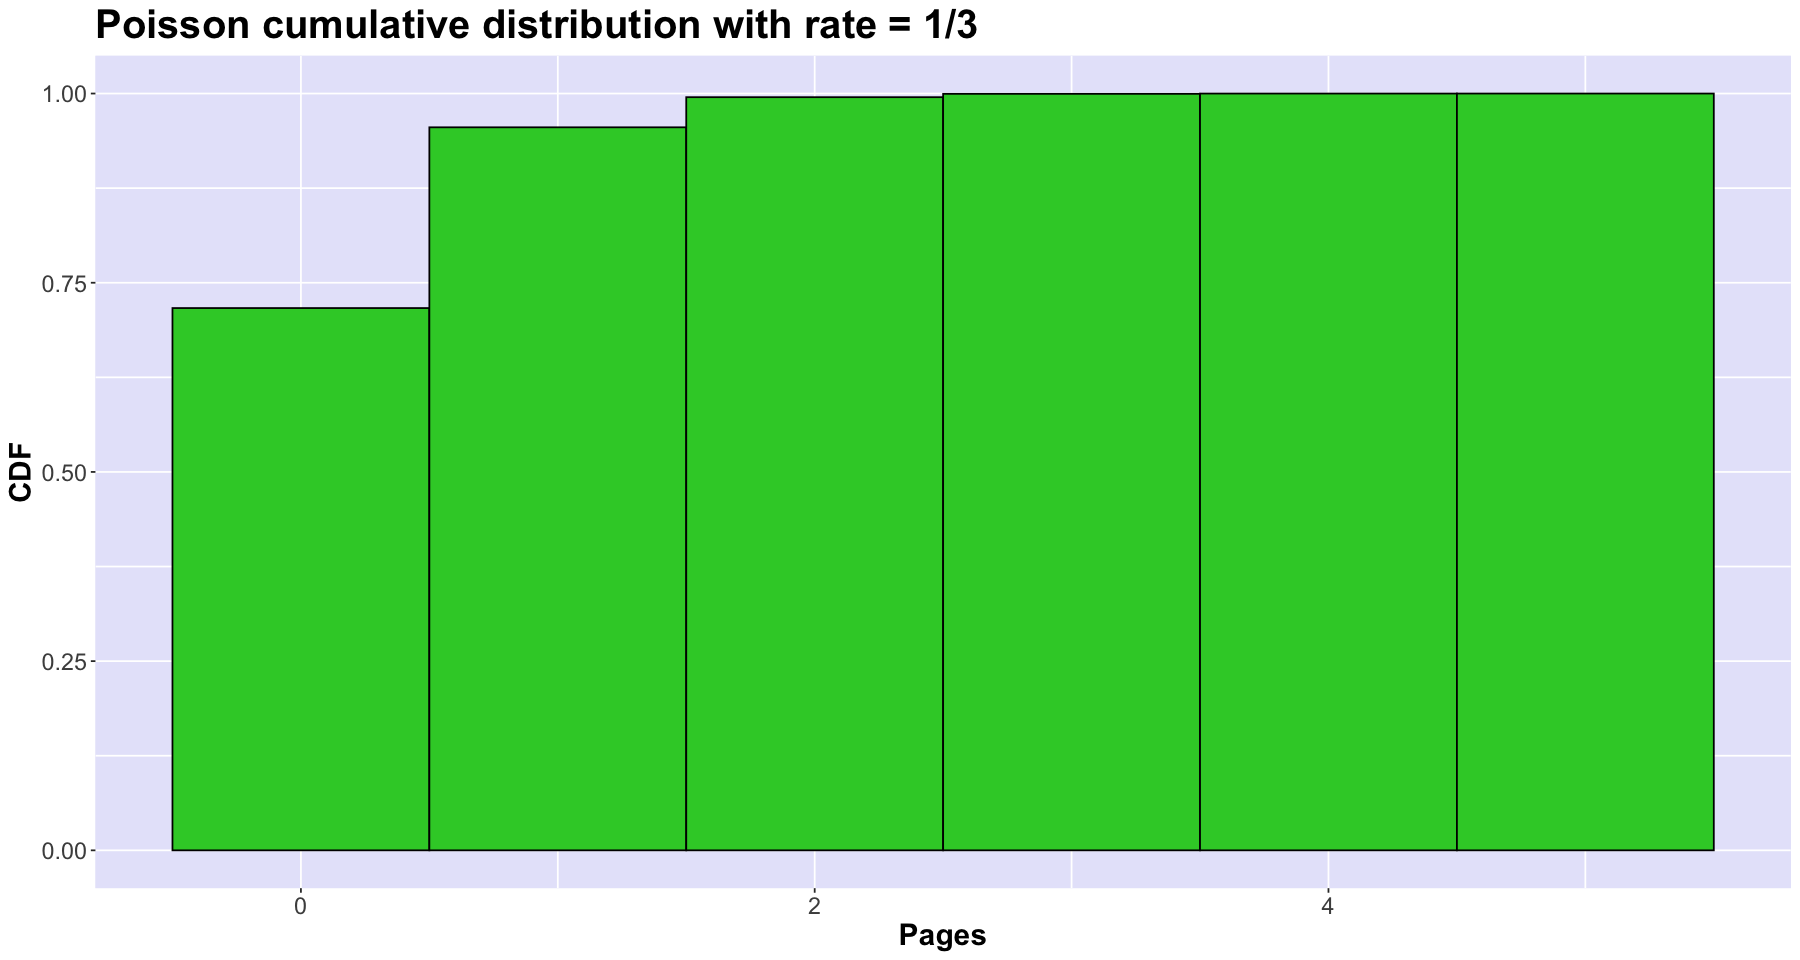

In [10]:
mu   <- 3
x3   <- seq(0,5,1)
pdf3 <- dpois(x3, 1/mu, log = FALSE)
cdf3 <- ppois(x3, 1/mu, lower.tail = TRUE, log.p = FALSE)

# pdf
ax <- plt(x3, pdf3, 'barplot2')

background(ax, 'Poisson probability distribution with rate = 1/3',  
                  'Pages', 'PDF' )

# cdf
background(plt(x3, cdf3, 'barplot2'), 'Poisson cumulative distribution with rate = 1/3',  
                  'Pages', 'CDF' )


Calculate the probability that there is at least one error on a specific page of the
book

In [11]:
cat("The probability that there is at least one error on a specific page of the book", 1- dpois(0, 1/mu))

The probability that there is at least one error on a specific page of the book 0.2834687

## EXERCISE 4

We randomly draw cards from a deck of 52 cards, with replacement, until one ace is
drawn. Calculate the probability that at least 10 draws are needed


In [12]:
p <- 4/52 # probability to extract an ace
q <- 1-p # probability to not extract an ace

cat('The probability that at least 10 draws are needed is 1 minus \ 
the probability to estract one or more aces in the previous 9 draws.
The process can be considered a Bernoulli process that is described by\
a binomial distribution with probability of success p = 4/52 (with 4 total number of aces) \
and probability to not success q = 1-p . The probability asked is :')

Prob <- 1 
S <-0
for (i in 1: 9)
{
    Prob <- Prob - dbinom(i, size=9, prob=p)
   
}


cat(Prob, '\n')

cat('\nOr instead it is possibile to compute the probability to not \
extract an ace for 9 draw: ')
cat(dbinom(9, size=9, prob=q))

cat('\nOf course the two results are the same.')

The probability that at least 10 draws are needed is 1 minus  
the probability to estract one or more aces in the previous 9 draws.
The process can be considered a Bernoulli process that is described by
a binomial distribution with probability of success p = 4/52 (with 4 total number of aces) 
and probability to not success q = 1-p . The probability asked is :0.4865652 

Or instead it is possibile to compute the probability to not 
extract an ace for 9 draw: 0.4865652
Of course the two results are the same.

## EXERCISE 5

The time it takes a student to complete a TOLC-I University orientation and evaluation test follows a density function of the form
$ f (t) = c(t − 1)(2 − t) $  for $  1 < t < 2 $ and 0 otherwise, where t is the time in hours.

a) using the integrate( ) R function, determine the constant c (and verify it analytically)

In [13]:
# determine the constant c :

F <- function(t) {
    f <- (t - 1)*(2 - t)   
    return(f)
}


Int <- integrate(F, lower = 1, upper = 2,
          stop.on.error = TRUE, keep.xy = FALSE, aux = NULL)$value
c <- 1 / Int
cat('The constant c is equal to ', c )

The constant c is equal to  6

In [14]:
# ANALYTICAL CHECK

pdf5 <- function(t, c ) {
    
    if (t > 1 & t < 2){
        f <- F(t)
        }
    else {
        f <- 0
    }
    
    return(f)
}

cat('Check analytically that the total integral is equal to 1:\n')

I <- function(t, c) (5 + c*(-(t*t*t/3) + (3*t*t/2) - (2*t)))
#    return(f)
#    }

cdf5 <- function(t, c = 6){
    
    if (t >= 1 & t <= 2){
        
        f <- I(t,c) - I(1, c)
        
    }
    
    else if (t<1){
        f <- 0
    }
    else if (t>2){
        f <- 1
    }
 
    return(f)
}

check <- cdf5(2, 6) - cdf5(1, 6)
cat('I = ',check)



Check analytically that the total integral is equal to 1:
I =  1

b) Write the set of four R functions and plot the pdf and cdf, respectively

In [15]:
# PDF AND CDF ALREADY WRITTEN ABOVE

# ICDF
inverse <- function(fn, interval = NULL, lower = min(interval), upper = max(interval), ...){
    Vectorize(function(y){
        uniroot(f=function(x){fn(x)-y}, lower=lower, upper=upper, ...)$root
    })
}

icdf5 <- inverse(cdf5, lower=1, upper=2)

# RANDOM GENERATOR 

random5 <- function( N ){
    step     <- 1/N
    x5       <- seq(0+step, 1-step , step)
    icdf_val <- c(1)
    for (i in x5)
    {
        icdf_val <- append(icdf_val, icdf5(i))
    }

    x5   <- c(0.0-step, x5)
    
    return (icdf_val)
}
    

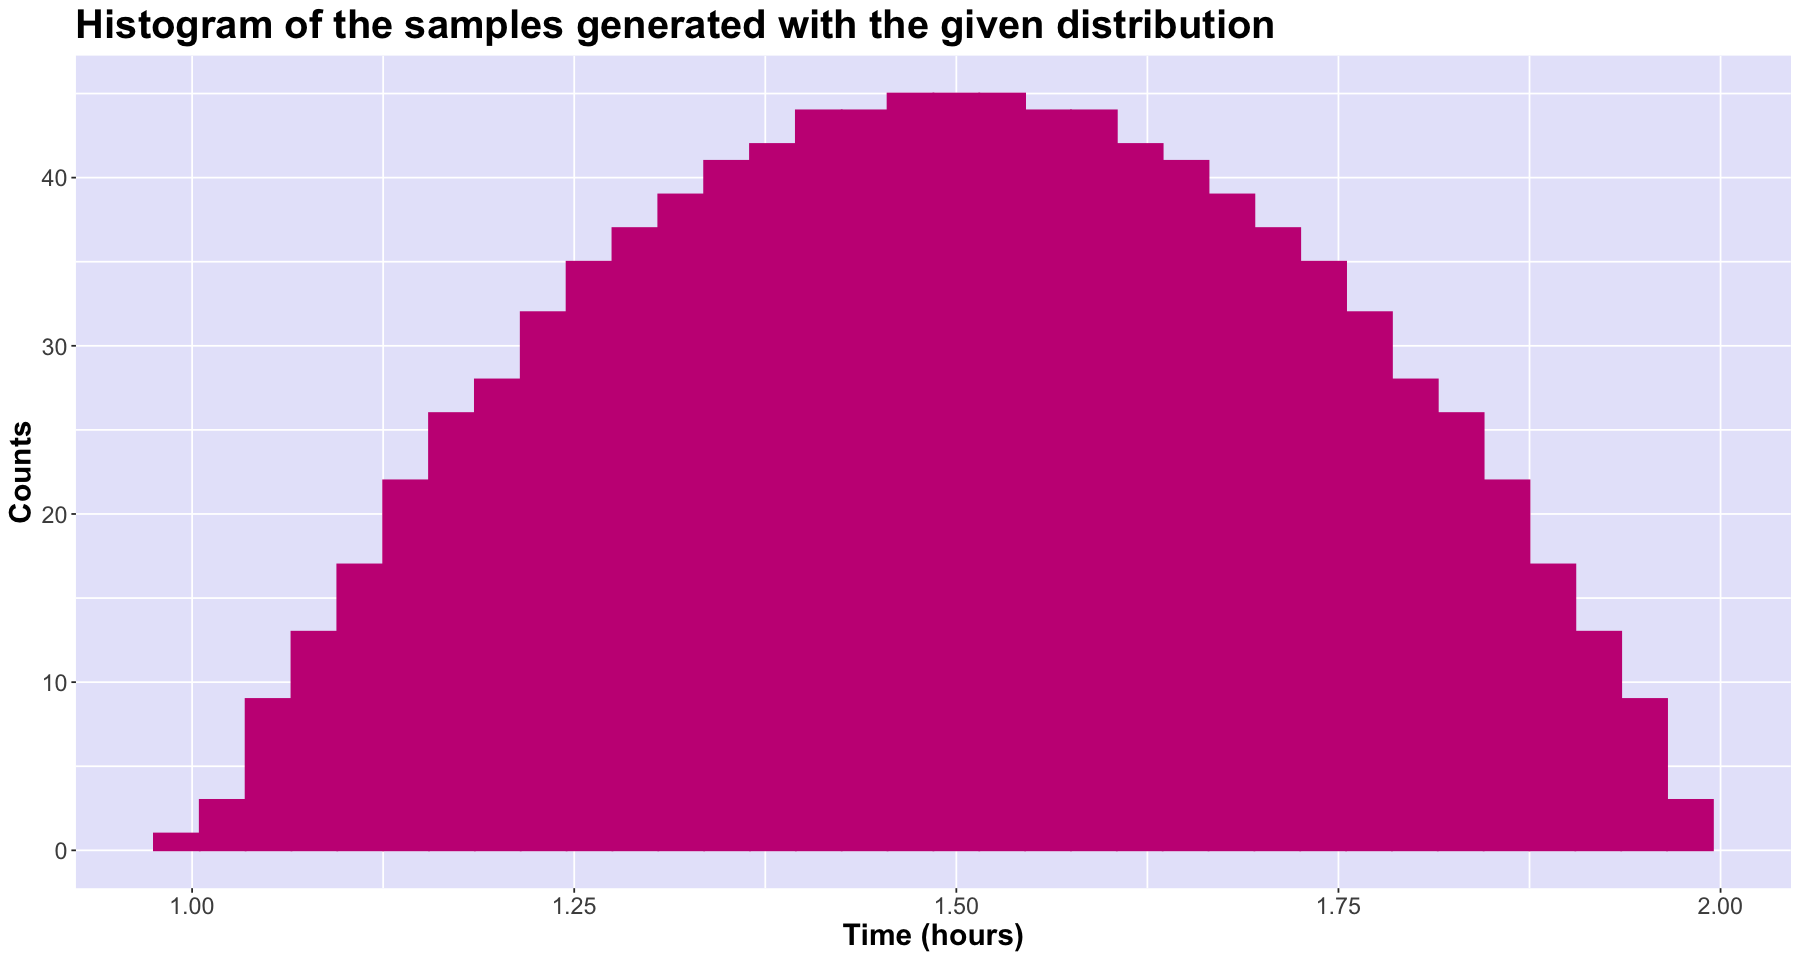

In [16]:
# check that the number generated follow the given distribution

random_val <- random5(1000)
y5 <- data.frame(random_val)
p <- ggplot( y5, aes(random_val) ) + 
    geom_histogram(fill = 'mediumvioletred', col = 'mediumvioletred', bins = 100, binwidth = 0.03 )  


background(p, 'Histogram of the samples generated with the given distribution',  
                  'Time (hours)', 'Counts' )

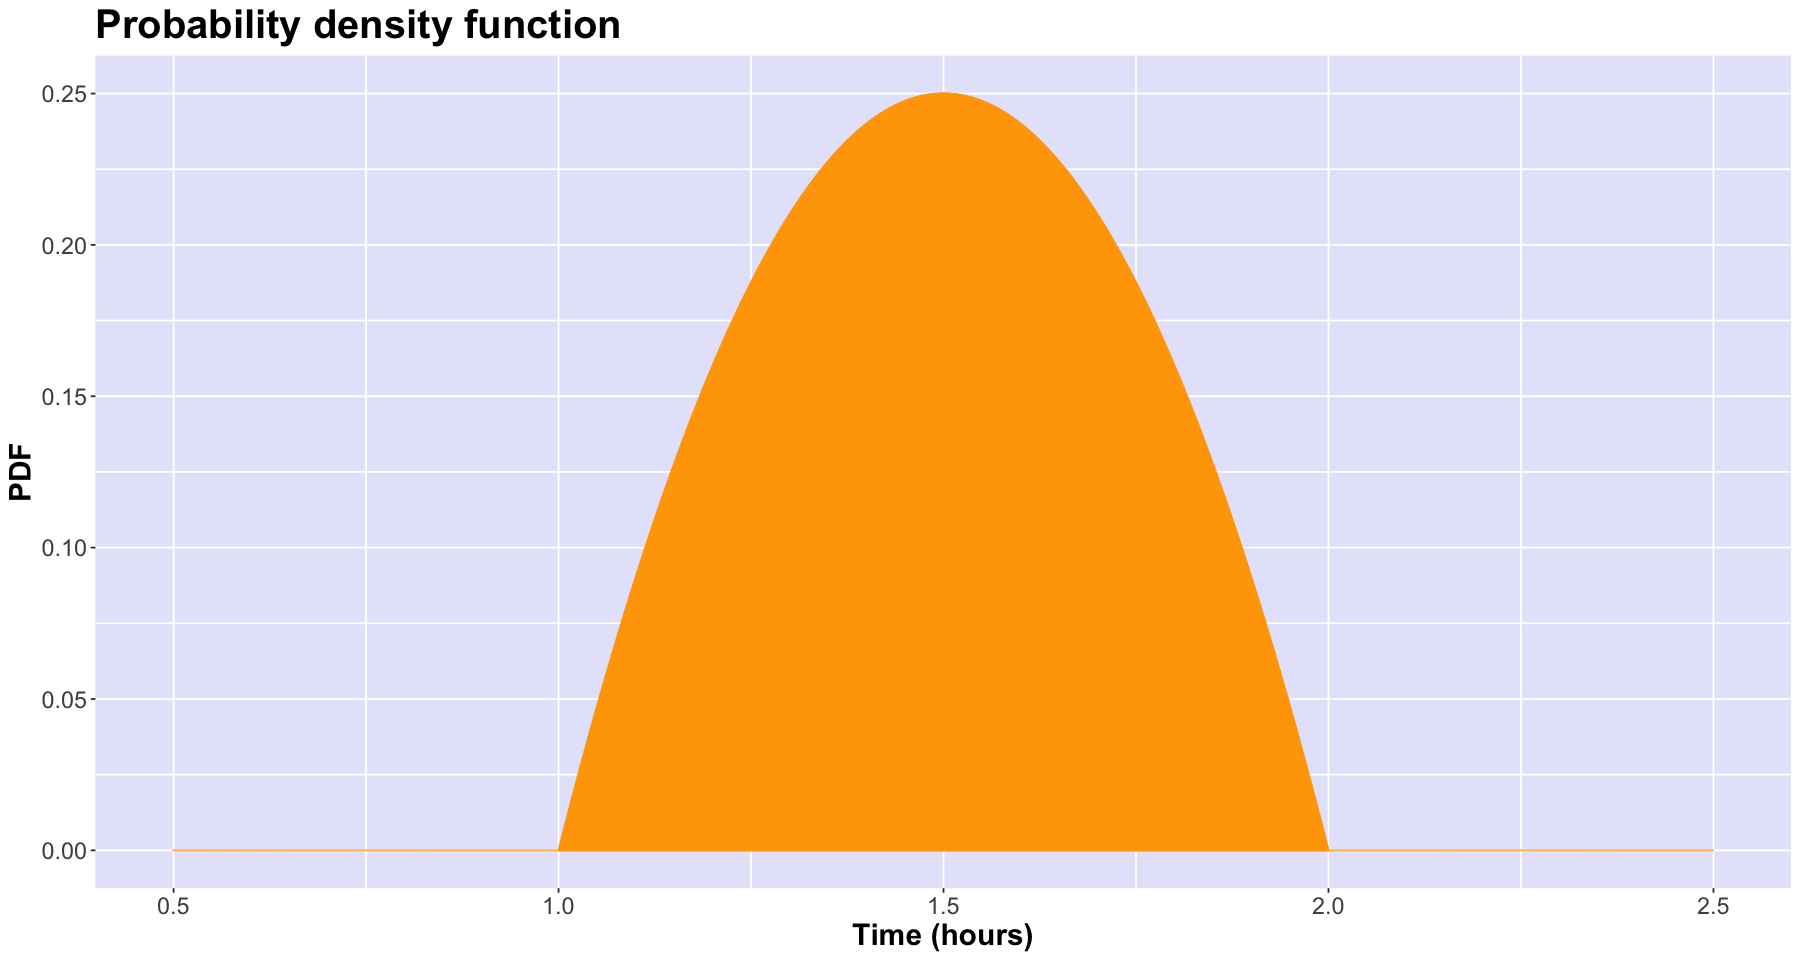

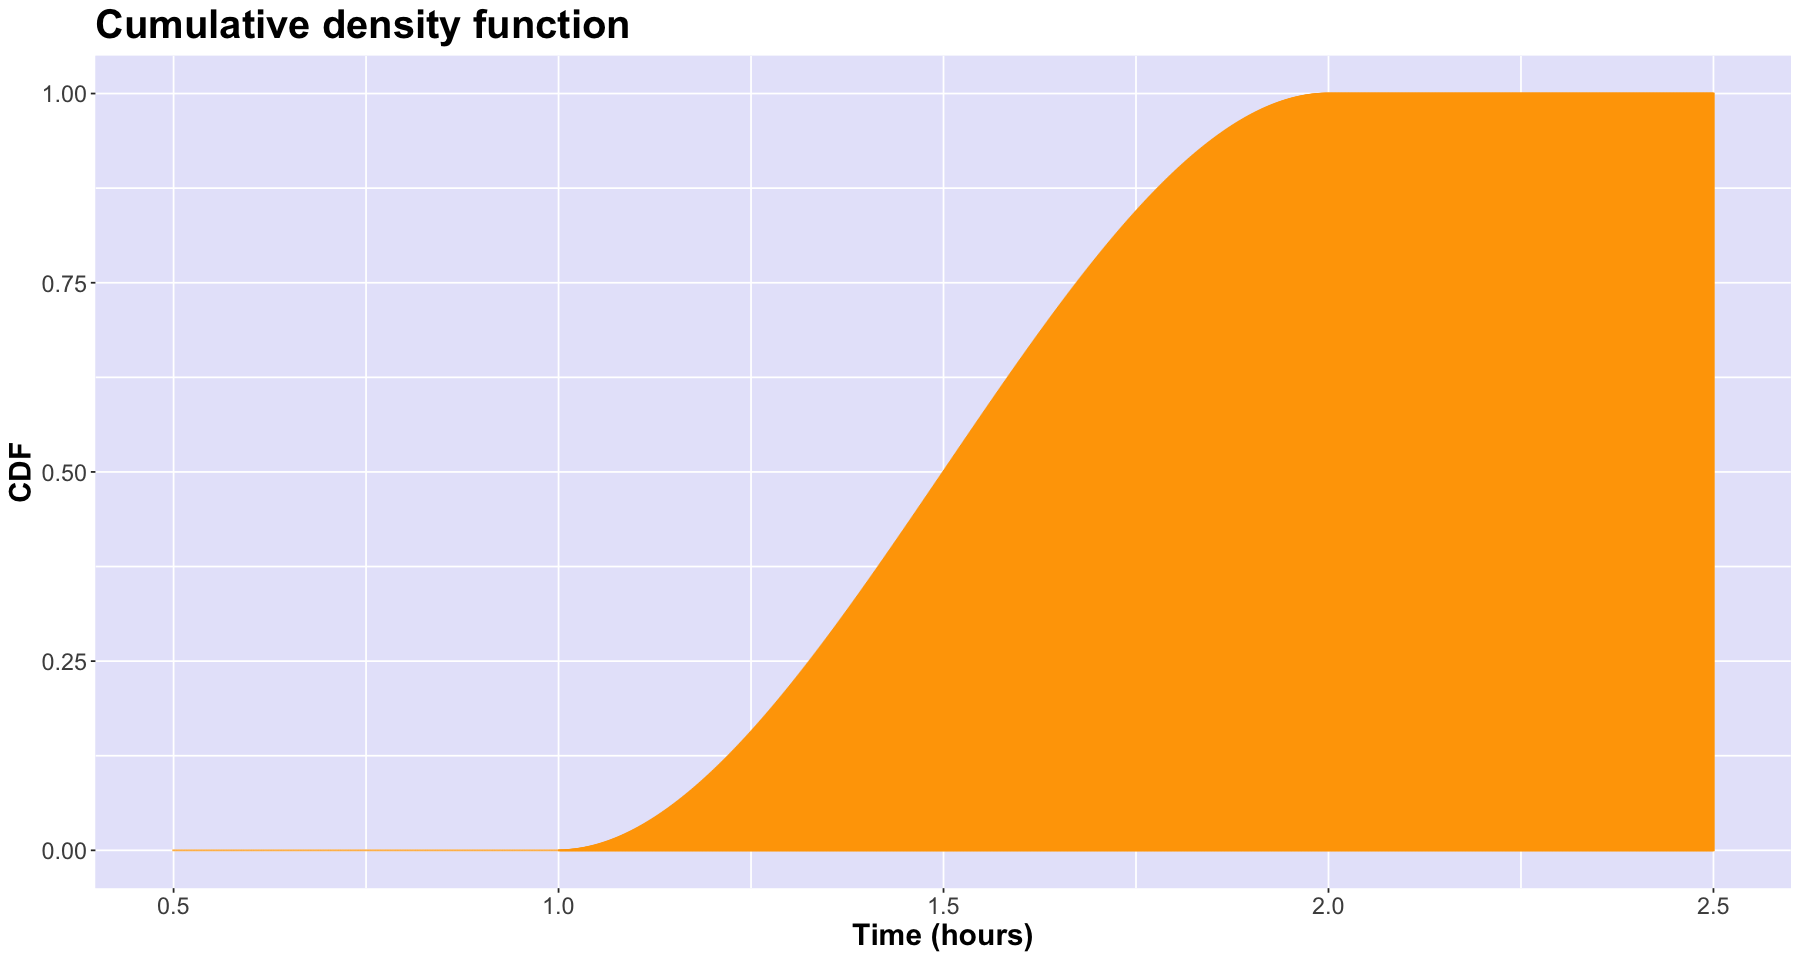

In [17]:
#   Plot the pdf and cdf
step    <- 0.001
x5      <- seq(0.5, 2.5 , step)
pdf_val <- c(0)
cdf_val <- c(0)
for (i in x5)
{
    pdf_val <- append(pdf_val, pdf5(i, c))
    cdf_val <- append(cdf_val, cdf5(i, c))
}

x5   <- c(0.5-step, x5)

background(plt( x5, pdf_val), 'Probability density function',  
                  'Time (hours)', 'PDF' )

background(plt( x5, cdf_val), 'Cumulative density function',  
                  'Time (hours)', 'CDF' )
#  'Time (minutes)', 'barplot')
#plot( x5, cdf_val,  'Time (minutes)', 'barplot')


c) Evaluate the probability that the student will finish the aptitude test in more than 75 minutes. And that it will take 90 and 120 minutes.

In [18]:
# convert in hours:
T1 <- 75 / 60
T2 <- 90/60
T3 <- 120/60


cat('Probability that the student will finish the aptitude test in more than 75 minutes: ', 1 - cdf5(T1, c))
cat('\nProbability that the student will need more than 90 and less than 120 minutes is: ', cdf5(T3, c) - cdf5(T2, c))


Probability that the student will finish the aptitude test in more than 75 minutes:  0.84375
Probability that the student will need more than 90 and less than 120 minutes is:  0.5

## EXERCISE 6

The lifetime of tires sold by an used tires shop is $10^4$x km, where x is a random
variable following the distribution function
$ f(x) =  2/x^2 $ for $1 < x < 2$ 0 otherwise.

a) write the set of four R functions and plot the pdf and cdf, respectively

In [19]:
pdf6 <- function(x) {
    if (x > 1 & x < 2){
    f <- 2/(x*x)
    }
    else {f <- 0}
    return(f)
}


cdf6 <- function(x){
    if (x > 1 & x < 2){
    f <- 2 - 2/x
    }
    else if (x >= 2){
        f <- 1
    }
    else {f <- 0 }
    return(f)
}

icdf6 <- function(z){
    
    f <- 2/z
    
    return(f)
}

random6 <- function(N){
    
    x  <- seq(1+1/N, 2- 1/N , 1/N)
    icdf6_val <- c(1)
    for (i in x)
    {
    icdf6_val <- append(icdf6_val, icdf6(i))
        
    }

    return(icdf6_val)
}

In [20]:
step6 <- 0.001
x6       <- seq(0.5, 2.5 , step6)
pdf6_val <- c(0)
cdf6_val <- c(0)
for (i in x6)
{
    pdf6_val <- append(pdf6_val, pdf6(i))
    cdf6_val <- append(cdf6_val, cdf6(i))
        
}

x6   <- c(0.5-step6, x6)

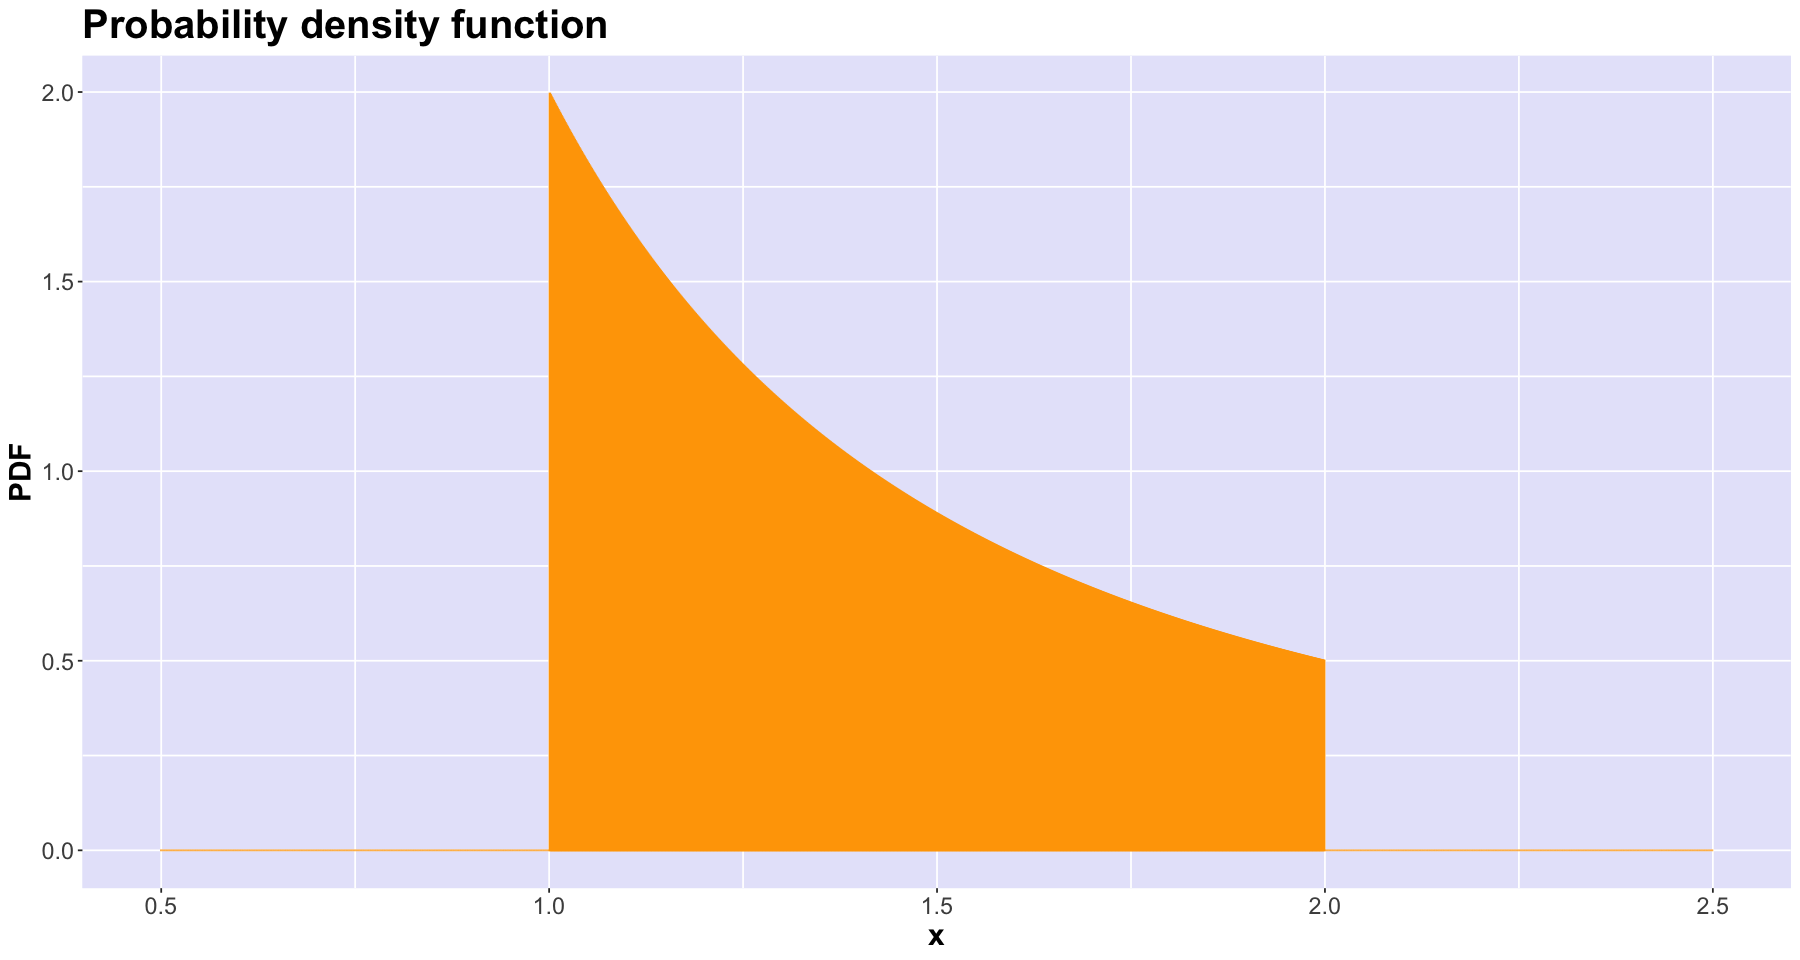

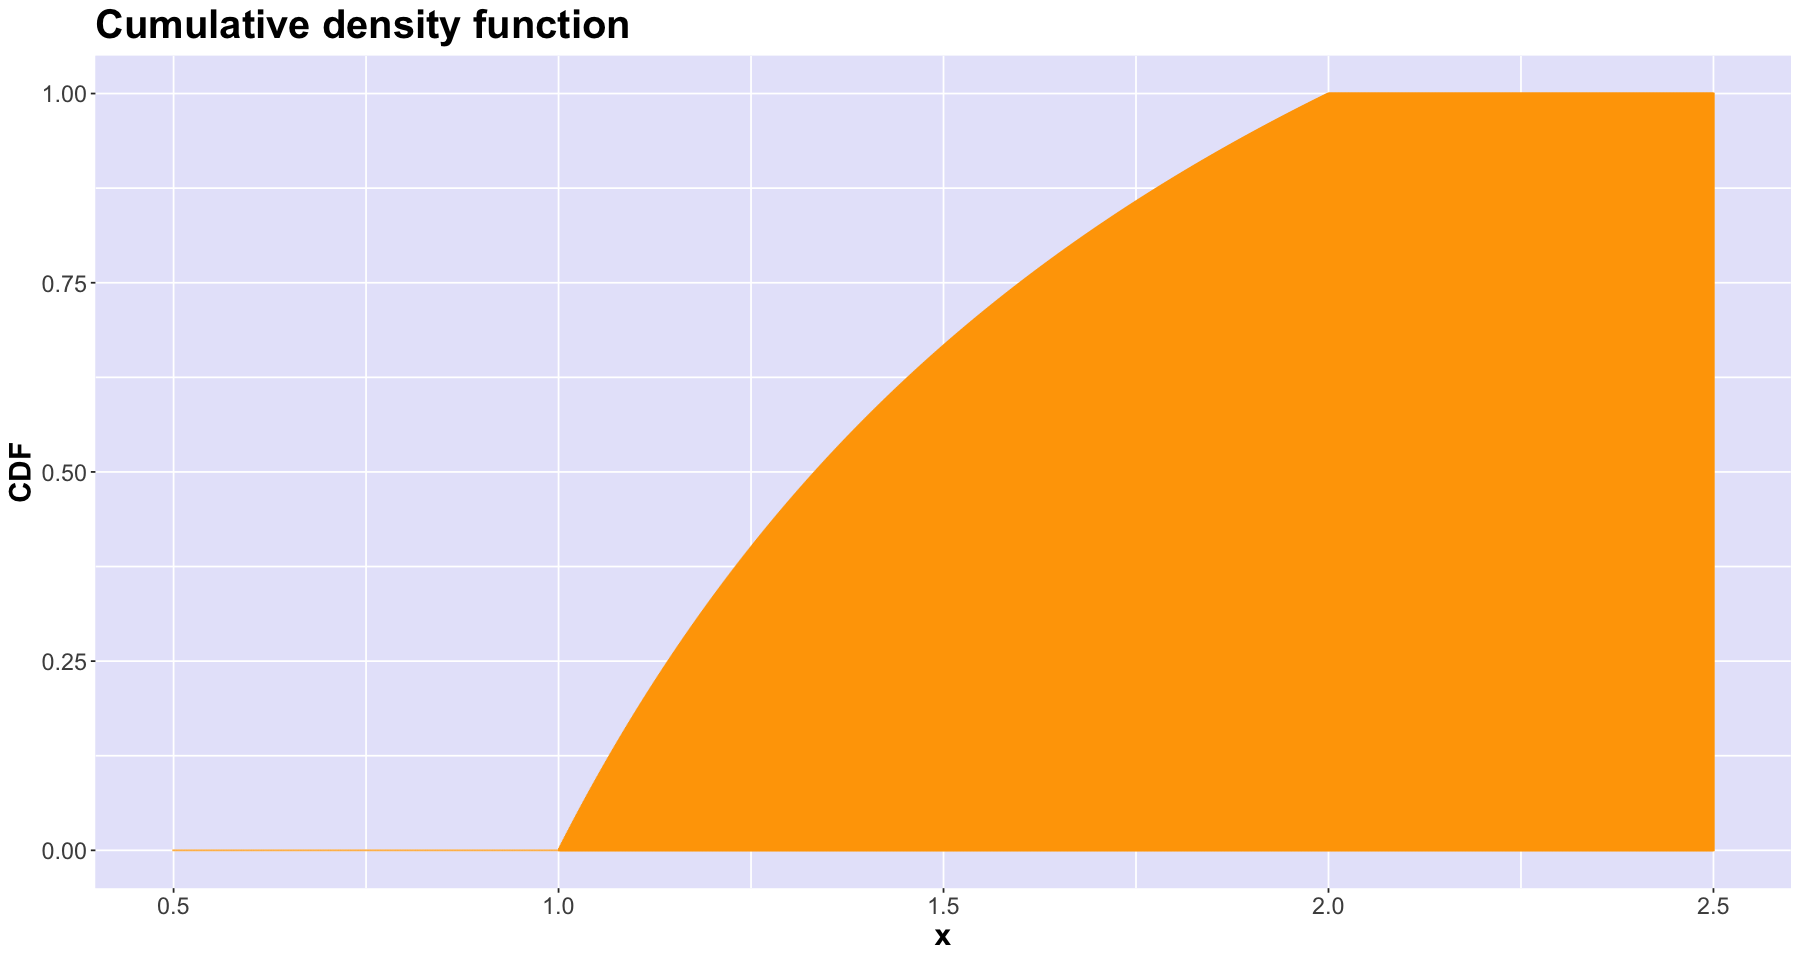

In [21]:
#PDF

background(plt(x6, pdf6_val), 'Probability density function',  
                  'x', 'PDF' )

#CDF
background(plt(x6, cdf6_val), 'Cumulative density function',  
                  'x', 'CDF' )



b) determine the probability that tires will last less than 15000 km

In [22]:
# cumulativ3:
duration <- 15000
x <- duration/10000
cat('Probability that tires will last less than 15000 km:', cdf6(x)- cdf6(1) )

Probability that tires will last less than 15000 km: 0.6666667

c) Sample 3000 random variables from the distribution and determine the mean value
and the variance, using the expression $Var(x) = E[x^2] − E[x]^2$


Mean value: 1.386128 
Variance:   0.07815004

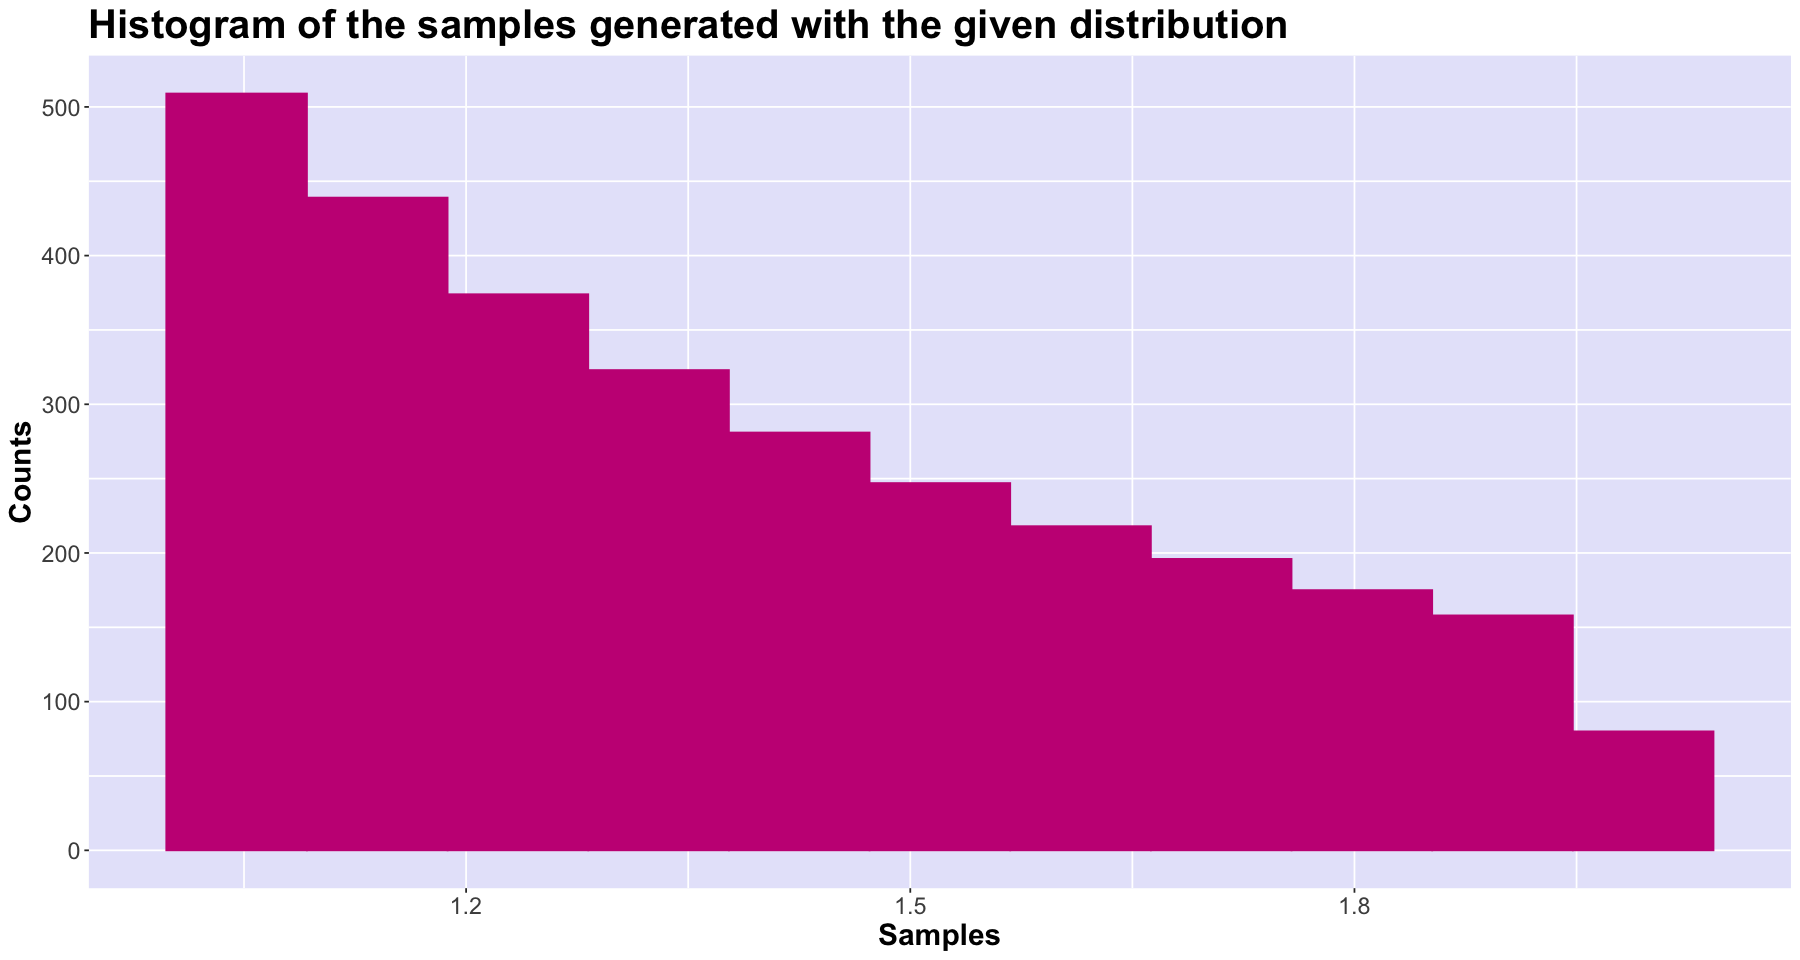

In [23]:
random_val6 <- random6(3000)
y6 <- data.frame(random_val6)
p6 <- ggplot( y6, aes(random_val6) ) + 
    geom_histogram(fill = 'mediumvioletred', col = 'mediumvioletred', bins = 30, binwidth = 0.095 )  


background(p6, 'Histogram of the samples generated with the given distribution', 'Samples', 'Counts' )

E   <- mean(y6$random_val6)
x_2 <- y6$random_val6*y6$random_val6
E2  <- mean(x_2)
var <- E2 - (E*E)
cat('\nMean value:', E, '\nVariance:  ', var)